# Rainbow

A notebook exploring rainbow / water-droplet geometry.

## Part 1 Single Water Drop

We build a conceptual picture of a rainbow using some ideas chained together; and then write up the results as Python code with a couple of plots to see if the results are self-consistent. Here are the ideas: 

* Rainbows are formed from the backscatter of light incident on water droplets. The light arrives from the sun (say) at a low grazing angle (say) from over your shoulder. You are looking directly away from the sun. The light particles (photons) hit water droplets suspended in the air in the direction you are looking. The pattern of reflected light is interpreted by you as arcs of concentric color. Red is on the inside of the bow, blue on the outside.
* We assume water droplets are small so surface tension pulls them into a spherical shape. They are suspended in the air and move slowly enough that we consider them to be stationary. 
* Light enters each water droplet in a spatially even distribution of parallel rays as if from an infinitely distant point source. We do not consider the solid angle subtended by the sun; but this is one of several details where one could come back and say 'wait a second... what about the geometric size of the sun?'
* Light entering the water droplet obeys Snell's law, traveling in a plane defined by two vectors: The incident velocity vector and the vector normal to the sphere at the point of incidence. This plane passes through the center of the circle. That is: Each photon travels in a circular disc that bisects the droplet. 
* This is a relative distribution problem. Consequently the radius of the droplets is immaterial and is taken to be 1. The number of photons is taken to be very large. The code below does not need to try and use actual photon counts or  droplet sizes. 'Lots' and '1' will do. 
* The scattering of light is calculated for a single droplet and then the effect of many such scatterers is considered.
* While many incident light particles scatter off the droplet, and while many more will pass through the back of the droplet, we are concerned only with backscatter and therefore only the following trajectory: 
    * The incident light particle (photon) enters the droplet
        * Its path bends on entry per Snell's law
    * The photon reflects off the back of the droplet thereby staying inside the droplet
        * Its path obeys angle of incidence = angle of reflection off the plane tangent to the droplet surface
    * The photon impinges a second time on the surface of the droplet, this time passing through it
        * Undergoing another path bend per Snell's law
* We make the problem two dimensional at first, considering one particular plane bisecting the water droplet sphere; so we are working with the unit circle. We take a uniform distribution of incident particles arriving at the first quadrant of that unit circle from y = 0 (aligned with the center of the droplet) to y = 1 grazing the top of the droplet. Each particle is initially traveling with no y-component to its velocity: It simply comes in from the far right on a path exactly parallel to the x-axis.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

In [2]:
epsilon = 0.001
domain = np.arange(-pi/2., pi/2.0, epsilon)
print type(domain)

<type 'numpy.ndarray'>


In [3]:
bins = domain.shape[0]
scale = float(bins)
blueRange = np.zeros(bins)
redRange = np.zeros(bins)

print redRange.shape

# print domain.ndim

(3142L,)


In [4]:
def indexOfRefraction(wavelength):
    if (wavelength < 400.0): return
    if (wavelength > 700.0): return
    ind400 = 1.339
    ind700 = 1.331
    deltaind = ind700 - ind400
    deltawavefraction = (wavelength - 400.0)/300.0
    return (deltaind * deltawavefraction) + ind400


In [5]:
def dropangle(y, wavelength):
    if (y < 0.0):
        return
    elif (y > 1.0): 
        return
    indWater = indexOfRefraction(wavelength)
    indAir = 1.00029
    theta1 = np.arcsin(y)
    theta2 = np.arcsin(np.sin(theta1)*(indAir/indWater))
    return 4.0*theta2-2.0*theta1


In [6]:
def getbin(theta):
    if (theta < -np.pi/2.0): return
    if (theta > np.pi/2.0): return
    
    bin = int((theta+np.pi/2.0)*(scale/np.pi))
    if (bin >= 0 and bin < bins):
        return bin


In [7]:
# sin theta-new / sin theta-old = index-old / index-new
def getThetaWater(thetaAir, indexAir, indexWater):
    term = (indexAir / indexWater) * sin(thetaAir)
    return arcsin(term)

In [8]:
# Same as above but reversing the calculation
def getThetaAir(thetaWater, indexWater, indexAir):
    term = (indexWater / indexAir) * sin(thetaWater)
    return arcsin(term)

In [9]:
# Snell's law generalization to incident and transmission media
def snell(thetaInc, indexInc, indexTrans):
    return arcsin((indexInc/indexTrans)*sin(thetaInc))

In [10]:
# you just know this already exists
def rtd(theta): return theta*180.0/pi

In [11]:
# you just know this already exists
def dtr(theta): return theta*pi/180.0

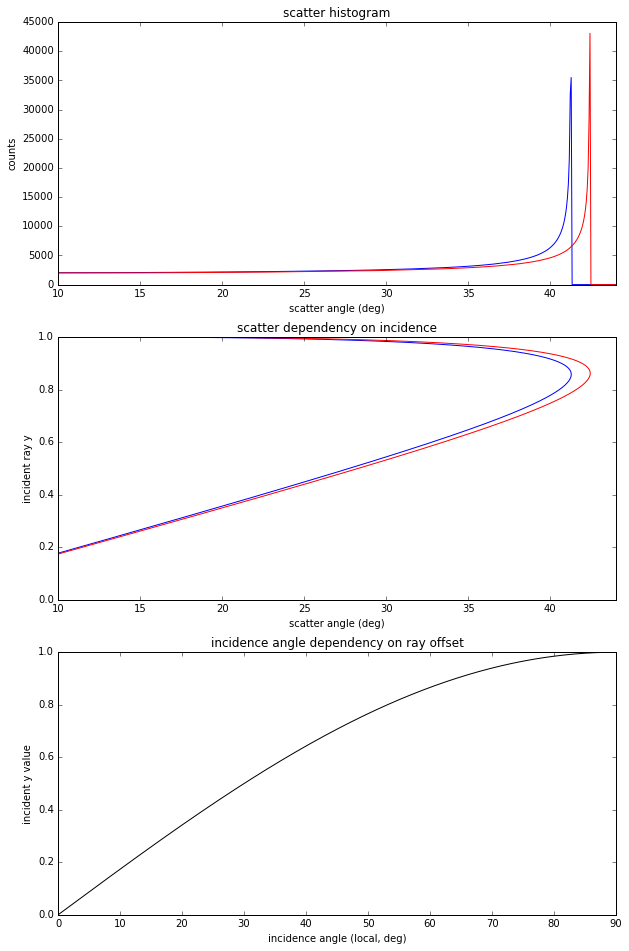

In [13]:
yIncident = []
yIncidentAngleDeg = []
angleRedDeg = []
angleBlueDeg = []

fig, axes = plt.subplots(3, figsize=(10,16))
ax0 = axes[0]
ax1 = axes[1]
ax2 = axes[2]

for y in np.arange(0.0, 1.0, 0.000001):
    yIncident.append(y)
    yIncidentAngleDeg.append(np.arcsin(y)*180./pi)
    thetaRed = dropangle(y, 700.0)
    thetaBlue = dropangle(y, 400.0)
    angleRedDeg.append(rtd(thetaRed))
    angleBlueDeg.append(rtd(thetaBlue))
    redBin = getbin(thetaRed)
    blueBin = getbin(thetaBlue)
    if blueBin >= 0 and blueBin < bins: blueRange[blueBin] += 1
    if redBin >= 0 and redBin < bins: redRange[redBin] += 1
  
# print type(domain)
# print type(histogram)
# plt.plot(domain, histogram)

domainDegrees = domain * 180.0 / pi

ax0.plot(domainDegrees, blueRange, 'b')
ax0.plot(domainDegrees, redRange, 'r')
ax0.set(xlim=(10.0, 44.0))
ax0.set(xlabel='scatter angle (deg)', ylabel = 'counts', title='scatter histogram')

ax1.plot(angleBlueDeg, yIncident, 'b')
ax1.plot(angleRedDeg, yIncident, 'r')
ax1.set(xlim=(10.0, 44.0))
ax1.set(ylabel='incident ray y', xlabel = 'scatter angle (deg)', title='scatter dependency on incidence')

ax2.plot(yIncidentAngleDeg, yIncident, 'k')
# ax2.plot(angleRedDeg, yIncident, 'r')
ax2.set(xlim=(0.0, 90.0),ylim=(0.0,1.0))
ax2.set(ylabel='incident y value', xlabel = 'incidence angle (local, deg)', title='incidence angle dependency on ray offset')



In [14]:

maxRedIndex = np.where(redRange == redRange.max())[0][0]
maxBlueIndex = np.where(blueRange == blueRange.max())[0][0]
redMaxAngleDegrees = domain[maxRedIndex]*180.0/np.pi
blueMaxAngleDegrees = domain[maxBlueIndex]*180.0/np.pi

redMAD2 = round(redMaxAngleDegrees, 2)
blueMAD2 = round(blueMaxAngleDegrees, 2)
print 'red:', redRange.max(),', index', maxRedIndex, '     angle:', redMaxAngleDegrees
print 'blue:', blueRange.max(),', index', maxBlueIndex, '     angle:', blueMaxAngleDegrees
print 'Wikipedia rainbow is 42.00 - 40.89 =', 42.00 - 40.89, 'degrees wide'
print 'This rainbow is', redMAD2, '-', blueMAD2, '=', round(redMaxAngleDegrees - blueMaxAngleDegrees, 2), 'degrees wide'

# 40.89 to 42 (red) is 1.11 degrees (Wikipedia article on rainbows)
# My rainbow is 1.146 degrees wide


red: 43054.0 , index 2311      angle: 42.4105464547
blue: 35488.0 , index 2291      angle: 41.2646308645
Wikipedia rainbow is 42.00 - 40.89 = 1.11 degrees wide
This rainbow is 42.41 - 41.26 = 1.15 degrees wide


## Part 2. Photon trajectory tracer

Now that we have shown an emphasized scattering direction... which is just the starting point of a convincing argument unless you like jumping to conclusions... it is time to look at what happens to the individual particles as they are incident on the water droplet. 

For wavelength 400 nm the max eject angle is 41.19 at incidence y = 0.84
For wavelength 700 nm the max eject angle is 42.41 at incidence y = 0.87


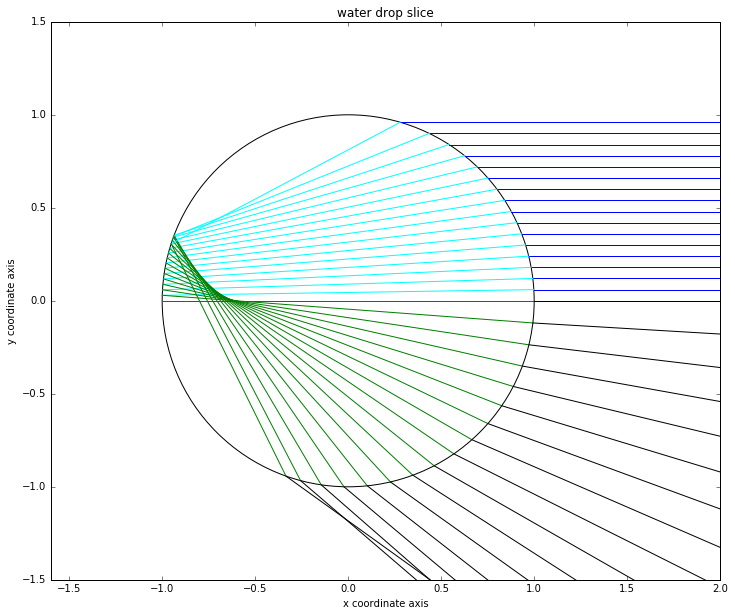

In [15]:
# let's do this the object way
%matplotlib inline

import numpy as np
from numpy import arange
from numpy import arctan2
from numpy import arcsin
from numpy import sin
from numpy import cos

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12,10))

# now we say that 'fig' is the overall canvas
# ax is the (list of) axes
# after this we leave fig alone and just use ax

# figure contains a bunch of axes (subplots(7)) and axis contains a bunch of artists

# How can we make the figure larger? 
# fig.set_figure()
# plt.figure(figsize=(12,12))
# fig = plt.figure(figsize=(12,10))

# a patch is a filled shape
# from matplotlib import patches
# patches.<tab> shows you them
ax.add_patch(plt.Circle((0, 0), 1, color = 'k', fill=False))

# Drawing a distant circle as the proxy for many observing eyes (ejected ray endpoint)
radiusCircleAtInf = 2.0
# ax.add_patch(plt.Circle((0, 0), radiusCircleAtInf, color = 'k', fill=False))

# unity aspect ratio
ax.axis('equal')

# How To note...
# ax.set_xlim(-7, 7)
# ax.set_ylim(-7, 7)

ax.set(xlim=(-1.1, 1.5), ylim=(-1.5,1.5))
ax.set(xlabel='x coordinate axis', ylabel = 'y coordinate axis', title='water drop slice')

maxEject = -pi
maxIncidentY = 0.0

colorScheme = 1
colorSelect = [
    [['blue','cyan','cyan','blue'],['red','orange','orange','red']], 
    [['blue','cyan','green','black'],['none','none','none','none']], 
    [['none','none','none','none'],['red','orange','orange','red']]  
    ]

for w in range(2):

    wavelength = 400 + 300*w

    # indices of refraction
    iorWater = indexOfRefraction(wavelength)
    iorAir = indAir = 1.00029

    yInterval = 0.06

    for y0 in arange(w*yInterval/2., 1.0, yInterval):
        # (x0, y0) is the point off at + infinity where one of the parallel rays comes in from
        x0 = 3.0

        # (x, y) is the point at which a ray intersects the surface of the droplet (radius = 1)
        # Call this point P
        # Call the center of the circle/sphere point C
        # Call (1, 0) the point U (for Unit). It is a convenient reference point.
        y = y0
        x  = np.sqrt(1.0-y*y)

        # here is our incident ray
        ax.plot([x0, x], [y, y], color=colorSelect[colorScheme][w][0])

        # Take out the radial lines to reduce clutter
        # ax.plot([0.0, x], [0.0, y], color='g')

        # incidenceAngle1 is measured relative to the circle (sphere) normal at (x, y)
        incidenceAngle1 = arctan2(y, x)

        # angleWater is the refracted angle: Bending in towards the normal line
        angleWater = snell(incidenceAngle1, iorAir, iorWater)
    
        # the ray will deflect and strike the far wall of the droplet at point Q
        # internal1 = angle QCP (a positive value; from isoscelesiness)
        internal1 = pi - 2*angleWater

        # internalTotal1 = angle QCU
        internalTotal1 = internal1 + incidenceAngle1

        # Q = (x2, y2)
        x2 = cos(internalTotal1)
        y2 = sin(internalTotal1)

        # Now draw the first leg of the journey inside the water drop
        ax.plot([x2, x], [y2, y], color=colorSelect[colorScheme][w][1])

        # The light reflects at Q using angle(incidence) = angle(reflection)
        # It will strike the surface of the droplet at point R
        # internal2 = angle QCR
        internal2 = pi - 2*angleWater              # the same as internal1!

        # internalTotal2 = RCU measured as positive from R clockwise to U
        internalTotal2 = internalTotal1 + internal2

        # R = (x3, y3)
        x3 = cos(internalTotal2)
        y3 = sin(internalTotal2)

        # Draw the second part of the path through the drop
        ax.plot([x2, x3], [y2, y3], color=colorSelect[colorScheme][w][2])
        # print rtd(angleWater)

        # externalTotal is the angle UCR measured from U clockwise to R 
        # It is 'external' because this angle is the angle of the normal at R
        externalTotal = 2*pi - internalTotal2

        # The rays will escape in some direction and intersect an outer circle of radius 'large'. 
        # S = the emergent ray's point of intersection with the outer circle = (x4, y4)

        # incidenceAngle2 = the incidence angle at R relative to the normal
        incidenceAngle2 = (pi - internal2)/2.

        # external = the transmission angle at R relative to the normal
        external = snell(incidenceAngle2, iorWater, iorAir)

        # ejectAngle is the angle at which the ray is ejected from the drop
        #   measured relative to the +x-axis direction. It will tend to be
        #   sign-changed in subsequent calculations; that is under the conditions
        #   established here it is technically negative. Soi sage.
        ejectAngle = externalTotal - external

        if ejectAngle > maxEject:
            maxEject = ejectAngle
            maxIncidentY = y0

        # Now we have triangle CRS from the center to the eject point R to the intersection
        #   of the ejected ray with Circle(radius 2) at point S. We need the coordinates of 
        #   S now. We could use a very large circle centered on R as an approximation for a
        #   very large circle centered at the origin C...
        radiusLarge = 1000.0
        x4 = radiusLarge * cos(-ejectAngle)
        y4 = radiusLarge * sin(-ejectAngle)
        ax.plot([x3, x4], [y3, y4], color=colorSelect[colorScheme][w][3])

    print 'For wavelength', wavelength, 'nm the max eject angle is',\
        round(rtd(maxEject),2), 'at incidence y =', maxIncidentY


## Part 3. Droplet from a distance

## Part 4. Fresnel has a say

There is an important extension of the basic geometric path given above: The photon/boundary interaction is probabilistic: There are probabilities for the photon's future for transmission, reflection, scattering and absorption; and even this is a simplification. Here I constrain the discussion to _'either reflect or transmit'_ to  explore the problem of rainbows in a bit more depth:

* Does the reflect / transmit probability vary with angle; which could change our intensity distribution that appeared very conveniently up above.
* Does the reflect / transmit probability give a story for secondary, tertiary etc rainbows?

The rule for transmit-versus-reflect is expounded (to a degree) by Wikipedia of course, under the topic of Fresnel equations: https://en.wikipedia.org/wiki/Fresnel_equations.

Interestingly for a particular wavelength we could use red and blue lasers together with a suitable attenuated light sensor to measure the reflection as a function of angle. This would be an experiment suited to students in the 11 to 18 years age range but I would recommend incorporating it into other work so as to avoid the _geek out problem_: If an enthusiast like me goes to a lot of trouble to show something that is already well understood it is not clear that the feeling of satisfaction will be shared by others who are less enthusiastic... But there is plenty of material just on this Notebook page to arrive at 'lots more'.

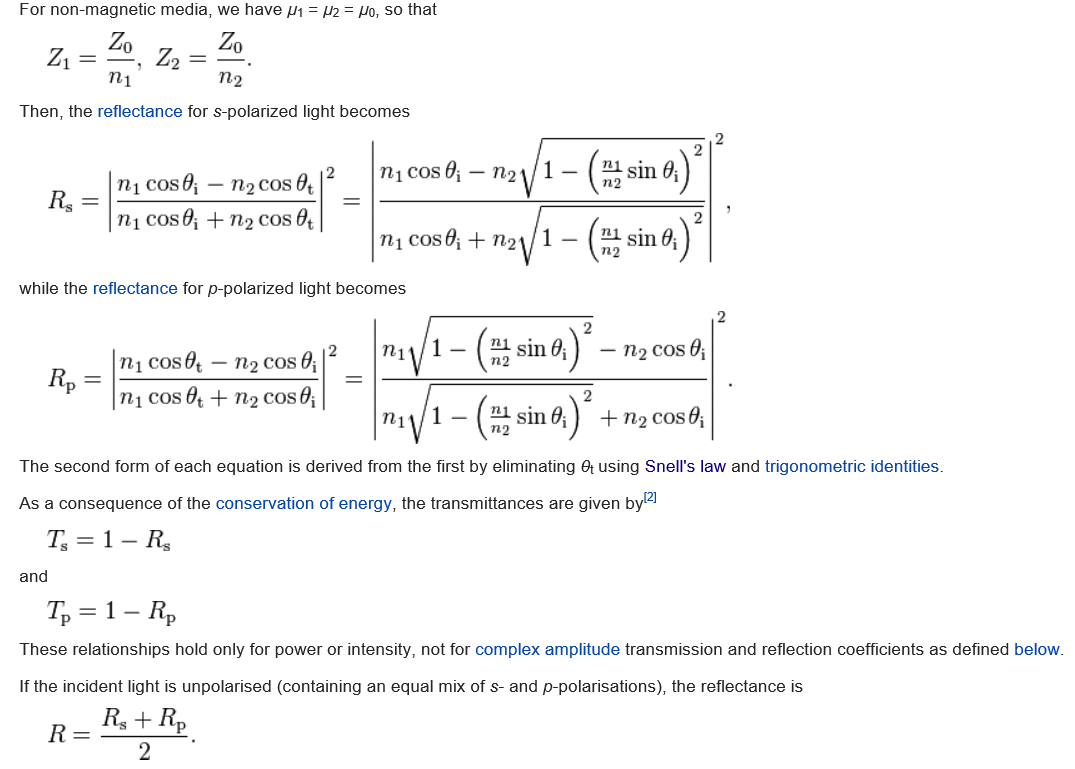

In [20]:
from IPython.display import Image 
fresnelEquations = Image(filename='../images/Fresnel_equations_Wikipedia.png')
fresnelEquations

In [21]:
def RCoefficient(theta, n1, n2):
    sineTerm = (n1/n2)*sin(theta)
    radArg = 1 - sineTerm*sineTerm
    radical = np.sqrt(radArg)
    RsNum = n1*cos(theta) - n2*radical
    RsDenom = n1*cos(theta) + n2*radical
    RpNum = n1*radical - n2*cos(theta)
    RpDenom = n1*radical + n2*cos(theta)
    Rs = (RsNum * RsNum) / (RsDenom * RsDenom)
    Rp = (RpNum * RpNum) / (RpDenom * RpDenom)
    return (Rs+Rp)/2.0

## Part 5. Paint balls

We now have a formalism that I hope is reasonably good for tracking the fate of sunlight relative to a single water droplet. Next I would like to use that formalism to imagine that there is a collection of water droplets each of which will be subjected to sunlight. Furthermore I will treat the sunlight like little paintballs and keep track of where they wind up supposing they splatter on a big white board. Obviously the board will block the sunlight so I'll leave it to your imagination to decide how to frame the experiment in a way that will work. I'm happy to let a bunch of photons go by me and bounce back off the droplets while I put the board in place.

## Part 6. The eye of the beholder

Finally (!) let's consider the cumulative effect of the droplets not on an entire surface but on only one location, that of your eye. This time I am going to put up a white board on the far side of the droplets. Now I light the sunlight shine on them; some of the photons are scattered back into my eye; and as I look around I can see the direction from whence they came. That is, I notice a blue photon coming from droplet A and a green photon coming from droplet B and so on. Whenever I see a photon of some color arriving from some droplet I will mark that location on the board with that color. Since the board is on the far side of the droplets and since the photons are always arriving at my eye from those droplets: I can always find a place to draw the dot on the board. It's a big board.  